In [1]:
def Ant_algorithm(dist_matrix, alfa = 0.5, betta = 0.5, rho = 0.5, Q = 100, max_t = 100,plot=False):
    '''
    dist_matrix - матрица расстояний
    alfa - коэффициент важности ферамонов
    betta - коэффициент важности видимости пути
    rho - коэффициент выветривания ферамона
    Q - нормированный множитель
    max_t - максимальное число эпох
    plot - принимает True,False - нужен ли график
    '''
    # Импорт библиотек
    import random
    import networkx as nx
    import pylab as plt
    %matplotlib inline
    
    # Задание локальный переменных
    n = len(dist_matrix)        # кол-во муравьем = кол-во узлов
    tabulist = [False] * n      # список пройденных муравьем вершин
    t = 0                       # счетчик эпох
    L = 0                       # длина пути муравья в данным моент времени
    min_path_len = float("inf") # длина минимального пути
    min_path = []               # минимальный путь

    # Генерирую начальные ферамоны
    feramon = []
    for i in range(n):
        val_list = []
        for j in range(n):
            if dist_matrix[i][j] != 0:
                val_list.append(random.uniform(0, 0.2))
            else:
                val_list.append(0)
        feramon.append(val_list)
    feramon
    
    # Цикл по эпохам
    while t != max_t:

        # Генерируем марицу для дельты ферамона
        delta_feramon = []
        for i in range(n):
            val_list = []
            for j in range(n):
                val_list.append(0)
            delta_feramon.append(val_list)
        delta_feramon
        
        # Цикл по муравьям
        for i in range(n):
            path = [i]
            L = 0
            tabulist = [False] * n

            ########### Нахождение очередного узла  ###############
            while sum(tabulist) != n:
                P_list = []
                P_list_id = []
                for j in range(n):
                    if tabulist[j] or dist_matrix[i][j] == 0:
                        continue
                    else:
                        P_list.append(feramon[i][j] ** alfa * (1 / dist_matrix[i][j]) ** betta)
                        P_list_id.append((i, j))

                P_list = [el / sum(P_list) for el in P_list]

                # Находим накопленную сумму
                import itertools
                P_list_accum = list(itertools.accumulate(P_list))

                # Случайние число
                rand = random.random()

                # Выбираем очередной путь
                for k in range(len(P_list_accum)):
                    if P_list_accum[k] > rand:
                        new_point = P_list_id[k - 1]  # дуга по которой в итоге пошел
                        break
                # Добавление посещенного узла в табулист
                tabulist[new_point[0]] = True
                tabulist[new_point[1]] = True
                # Увеличение длины пути
                L += dist_matrix[new_point[0]][new_point[1]]

                # Изменяем вершину, куда пришел муравей
                if new_point[0] == i:
                    i = new_point[1]
                else:
                    i = new_point[0]
                path.append(i)

            # копим ферамоны, оставленные каждым муравьем
            for l in range(n):
                for k in range(n):
                    if [l, k] in [[path[j], path[j + 1]] for j in range(n - 1)] + [[path[j + 1], path[j]] for j in range(n - 1)]:
                        delta_feramon[l][k] = Q / L
                        delta_feramon[k][l] = Q / L

            if L < min_path_len:
                min_path = path
                min_path_len = L

            # print("длины:", L)
            # print(path)

        ########## Подготовка к новой эпохе  ###############
        for l in range(n):
            for k in range(n):
                    feramon[l][k] = (1 - rho) * feramon[l][k] + delta_feramon[l][k]
        t += 1
    print("\nминимальный путь:\n",list(map(lambda x:x+1,min_path)))
    print("длины:",min_path_len)
    print("Если нужно вернуться в начальную точку длинна пути:",min_path_len + dist_matrix[min_path[-1]][min_path[0]])
    
    
    # Рисование графа
    if plot:
        #  Преобразуем в нужный вид граф
        edges_list = []
        for i in range(len(dist_matrix)):
            for j in range(len(dist_matrix[0])):
                if dist_matrix[i][j]!=0:
                    edges_list.append((i+1,j+1,dist_matrix[i][j]))

        # Преобразуем в нужный вид найденный путь
        new_path = []
        for i in range(len(min_path)-1):
            new_path.append((min_path[i]+1,min_path[i+1]+1))
        new_path.append((min_path[-1],min_path[0]))

        G=nx.Graph()
        G.add_weighted_edges_from(edges_list)
        plt.rcParams['figure.figsize'] = (n*2, n*2)

        # Specify the edges you want here
        red_edges = new_path
        edge_colours = ['black' if not edge in red_edges else 'red'
                        for edge in G.edges()]
        black_edges = [edge for edge in G.edges() if edge not in red_edges]

        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('Pastel2'), node_size = n*1000)
        nx.draw_networkx_labels(G, pos,font_color="white", font_size=n*4)
        nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r',width=5 ,arrows=True)
        if n < 9:
            nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
            nx.draw_networkx_edge_labels(G, pos,font_size=n*4, edge_labels=nx.get_edge_attributes(G, 'weight'))   
        plt.show()
        

## Маленький пример


минимальный путь:
 [4, 3, 1, 2, 5]
длины: 29
Если нужно вернуться в начальную точку длинна пути: 39


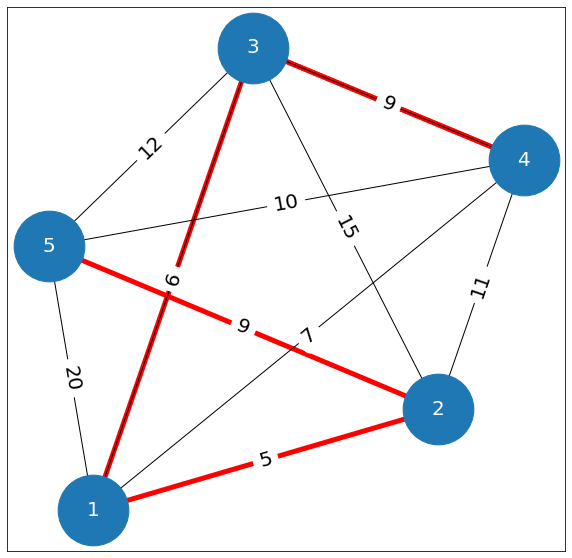

In [2]:
matrix = [
    [0, 5, 6, 7, 20],
    [5, 0, 15, 11, 9],
    [6, 15, 0, 9, 12],
    [7, 11, 9, 0, 10],
    [20, 9, 12, 10, 0]
]

Ant_algorithm(matrix,plot=True)

# Примеры побольше

In [4]:
import pandas as pd
import time

# Парсим документ с исходными данными
doc_list = []

with open("bayg29.tsp","r") as doc:
    for line in doc:
        doc_list.append(line.strip("\n"))

dim = int(doc_list[3][11:]) # Считываем из файла размерность данных
Dist_matrix = doc_list[8:8+dim-1]

matrix_right = []
for line in Dist_matrix:
    step1 = list(map(int,line.split()))
    matrix_right.append([0]*(dim - len(step1)) + list(reversed(step1)))
matrix_right.append([0]*dim)
matrix_left = list(map(list, zip(*matrix_right)))

Dist_matrix = (pd.DataFrame(matrix_right)+pd.DataFrame(matrix_left)).values.tolist()

start = time.time()
Ant_algorithm(Dist_matrix,max_t=100)
print(time.time()-start)


минимальный путь:
 [7, 21, 24, 29, 6, 15, 4, 20, 1, 22, 10, 9, 12, 18, 27, 3, 2, 17, 13, 19, 11, 23, 5, 14, 28, 16, 25, 8, 26]
длины: 3489
Если нужно вернуться в начальную точку длинна пути: 3636
33.58710813522339


In [162]:
# Опитмальный путь (данный)
doc_list = []
with open("bayg29.opt.tour","r") as doc:
    for line in doc:
        doc_list.append(line.strip("\n"))

path = list(map(int,doc_list[5:-2]))
print(path)
path_len = 0

doc_list = list(map(lambda x: int(x)-1,doc_list[5:-2]))
for i in range(dim-1):
    path_len+=Dist_matrix[doc_list[i]][doc_list[i+1]]
print("\nДлина оптимального пути:",path_len)

[1, 28, 6, 12, 9, 26, 3, 29, 5, 21, 2, 20, 10, 4, 15, 18, 14, 17, 22, 11, 19, 25, 7, 23, 8, 27, 16, 13, 24]

Длина оптимального пути: 4440



минимальный путь:
 [5, 15, 17, 30, 27, 22, 25, 41, 24, 14, 2, 28, 8, 39, 31, 7, 16, 37, 34, 3, 13, 11, 26, 1, 36, 18, 35, 38, 23, 9, 40, 4, 19, 6, 12, 10, 33, 20, 29, 32, 21]
длины: 3514
Если нужно вернуться в начальную точку длинна пути: 3655


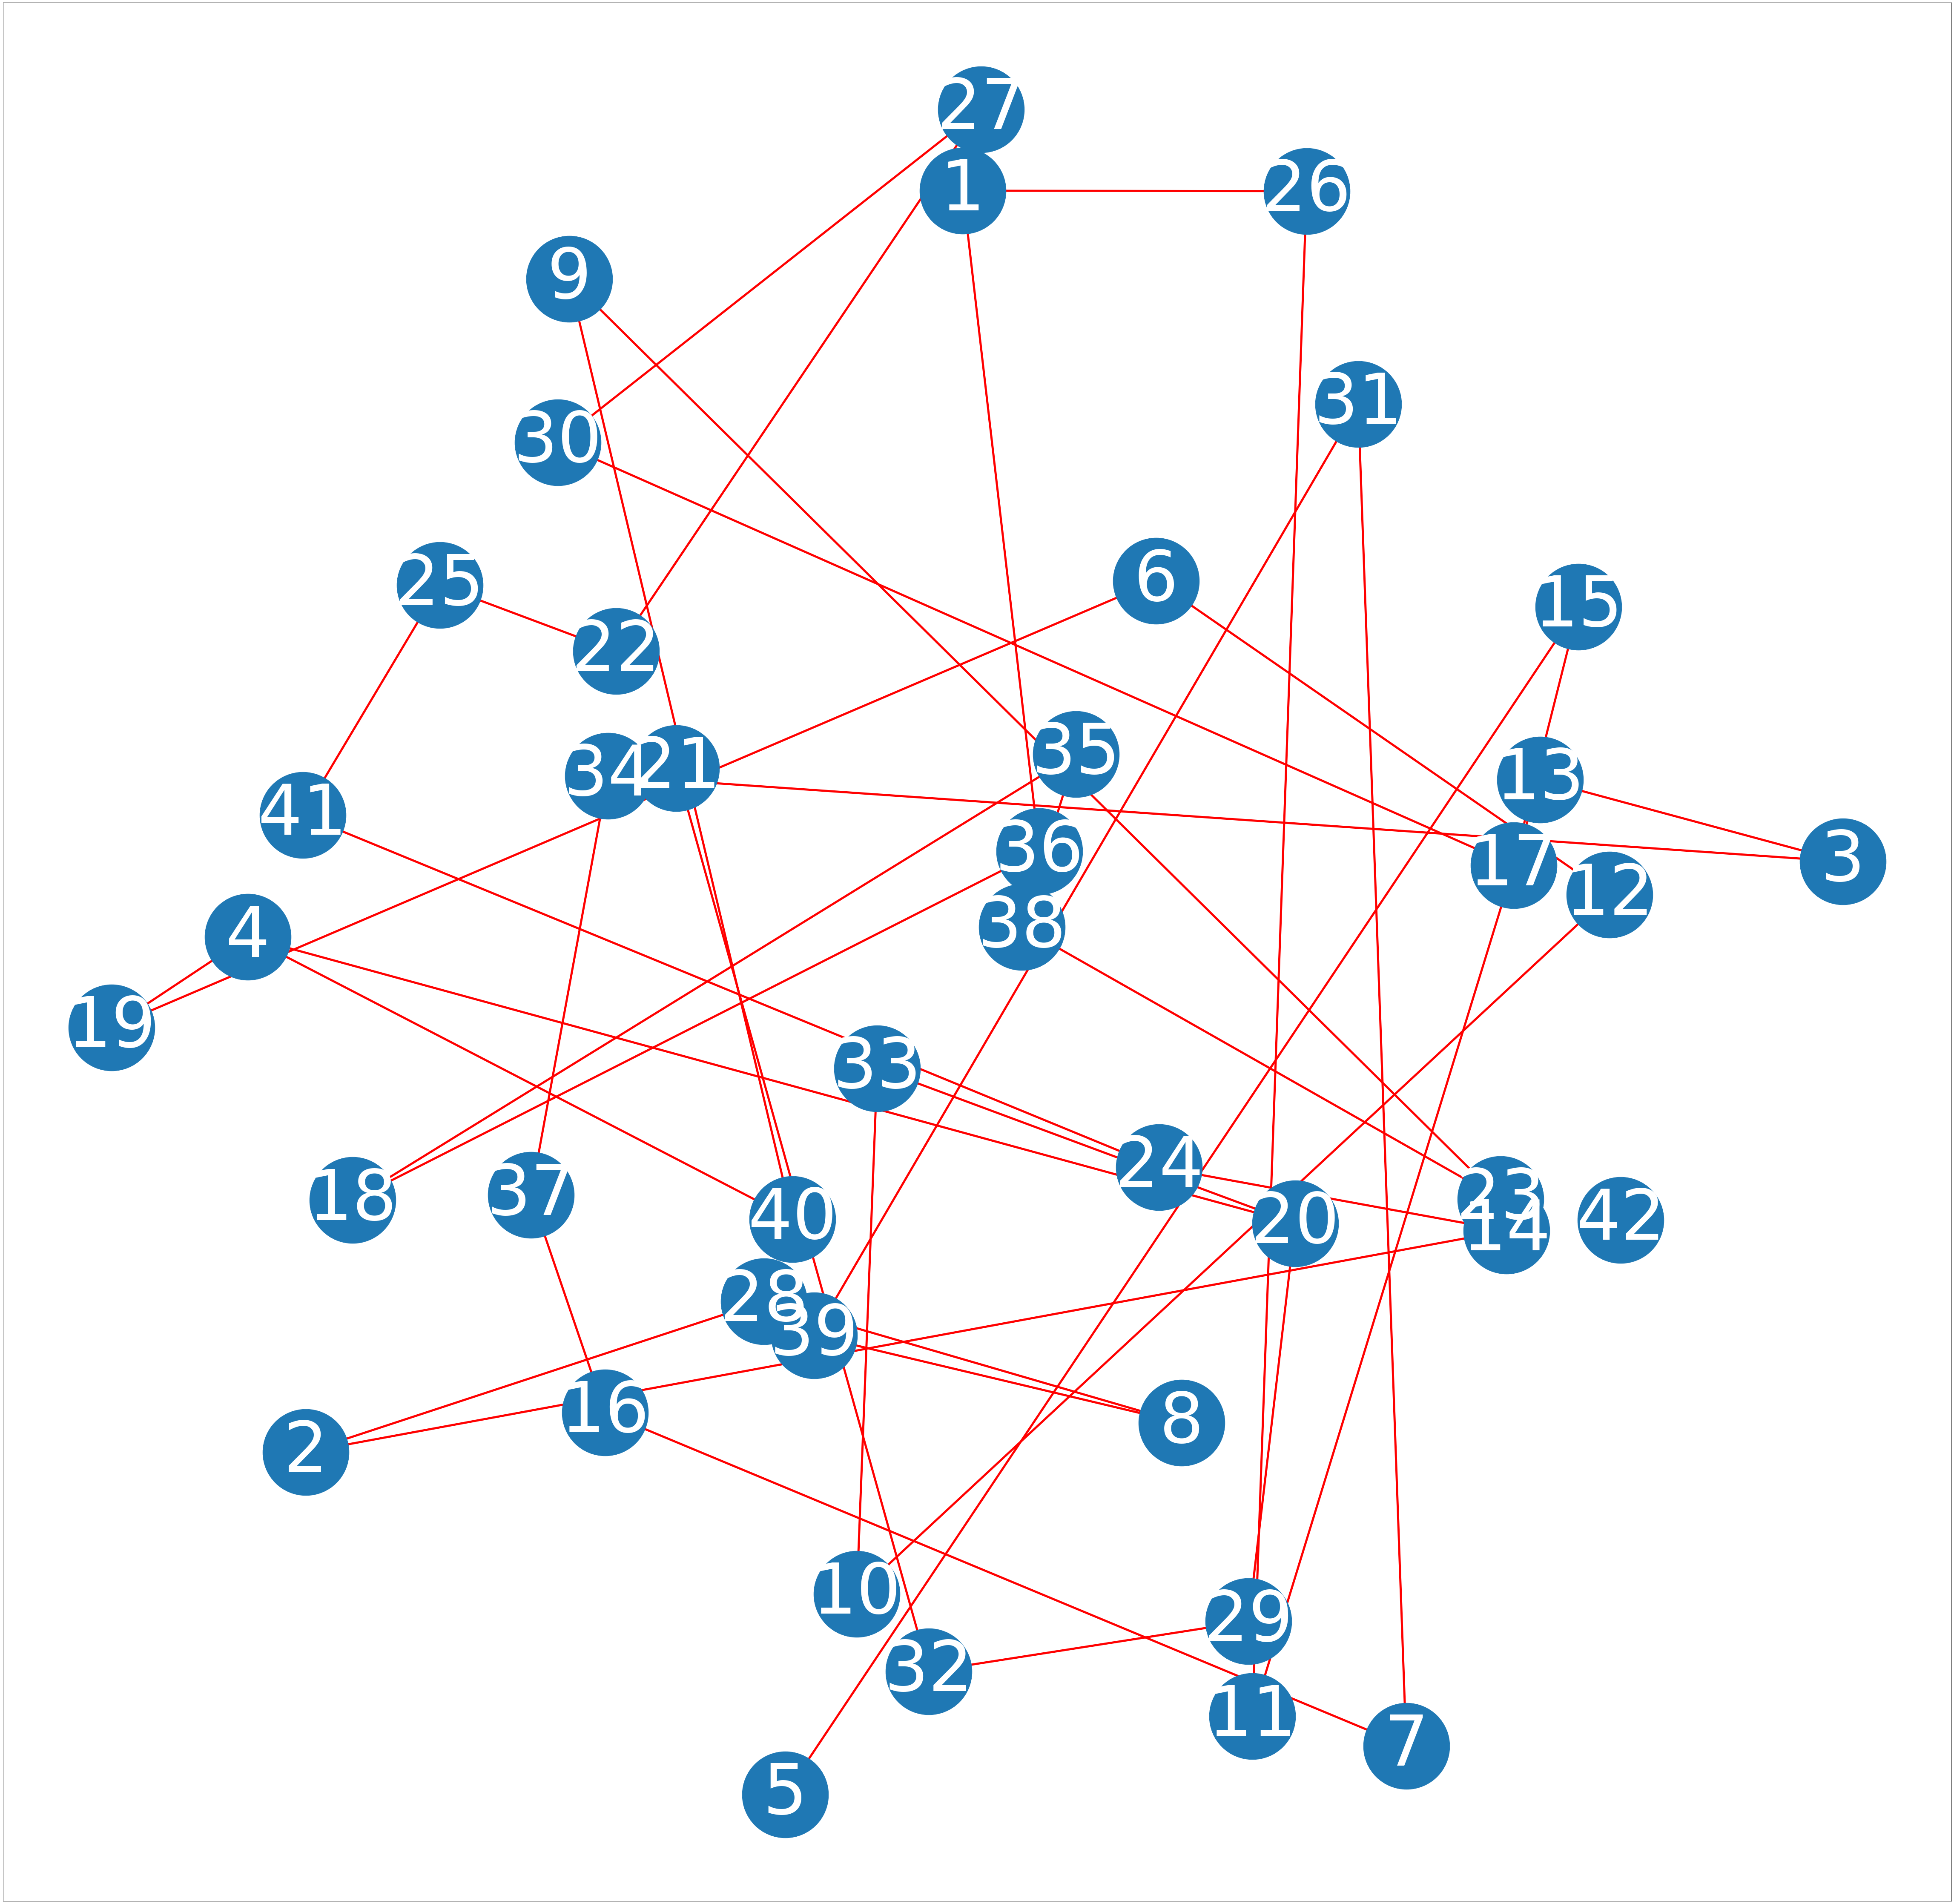

In [165]:
doc_list = []
with open("swiss42.tsp","r") as doc:
    for line in doc:
        doc_list.append(line.strip("\n"))

doc_list
dim = int(doc_list[3][11:]) # Считываем из файла размерность данных
Dist_matrix = doc_list[8:8+dim-1]
my_matrix = []
for line in Dist_matrix:
    my_matrix.append(list(map(int,line.split())))
my_matrix

Ant_algorithm(my_matrix,max_t=10, plot=True)